In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [88]:
import os
from utils.DataManager import DataManager as DM

## Preprocessing Data
- Resize to 1024x1024 pixels by keeping aspect ratio
- 400go -> 25go

In [89]:
# path to the ROL dataset
path_rol = "D:/Dataset" 
# path to the compressed ROL dataset
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
# path to the similar ROL dataset
path_sim_rol = "D:/Dataset/similaire_rol/similaires_rol" 
# path to the compressed similar ROL dataset
path_sim_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_compressed" 
# path to the extracted images similar ROL dataset
path_sim_rol_extract = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted"

if os.path.exists(path_rol_comp) and os.path.exists(path_sim_rol_comp):
    print("[INFO] Data already compressed")
else:
    print("[INFO] Compressing data")
    DM.read_and_compress_files(path_sim_rol, path_sim_rol_comp, max_workers=4, single_folder=True)
    DM.read_and_compress_files(path_rol, path_rol_comp, max_workers=4, single_folder=False)

[INFO] Data already compressed


1/1 [==============================] - 2s 2s/step


KeyboardInterrupt: 

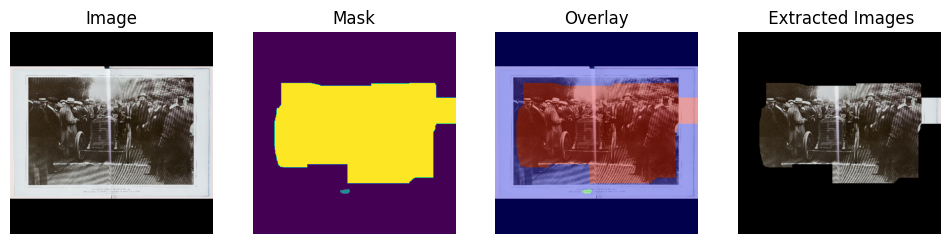

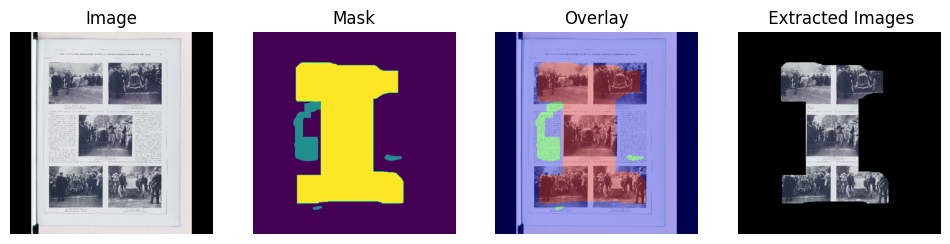

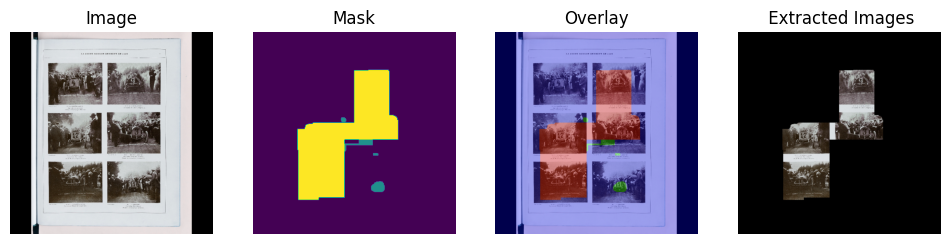

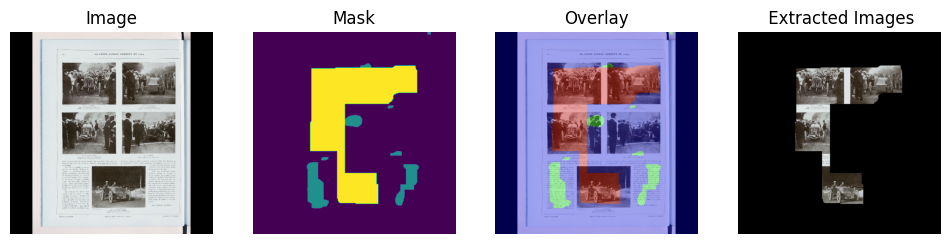

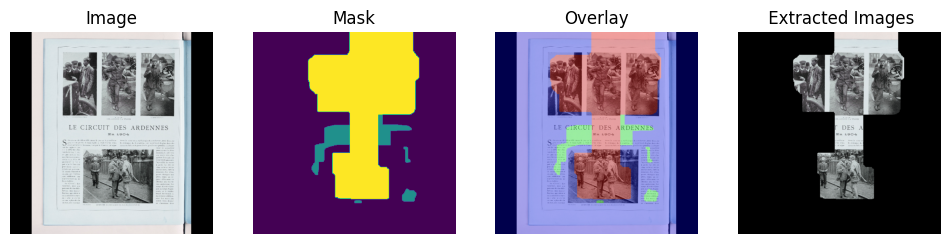

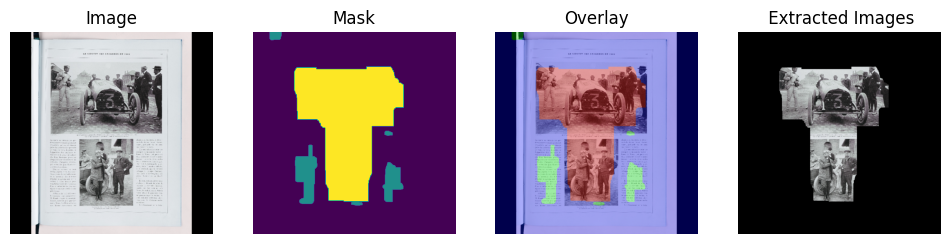

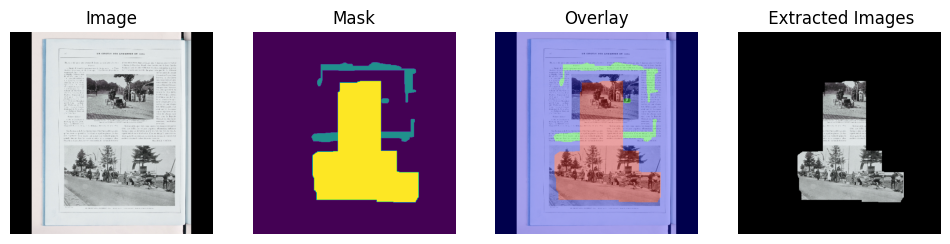

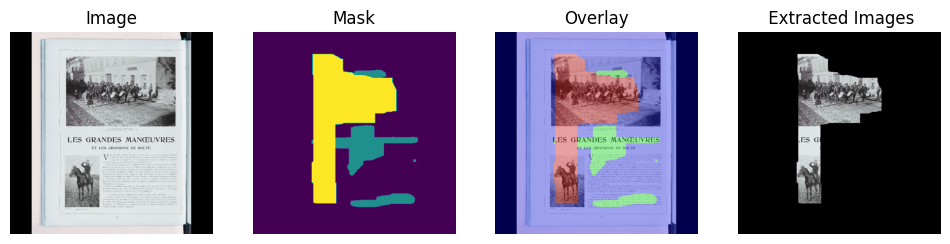

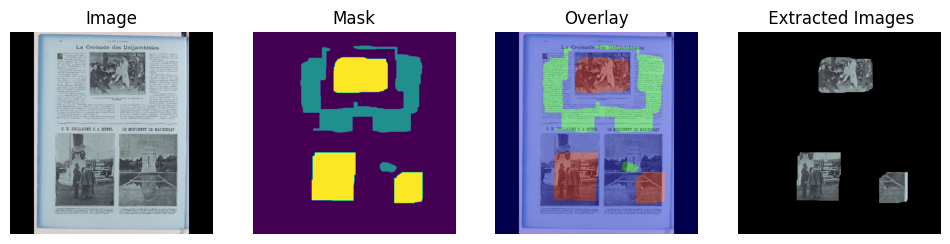

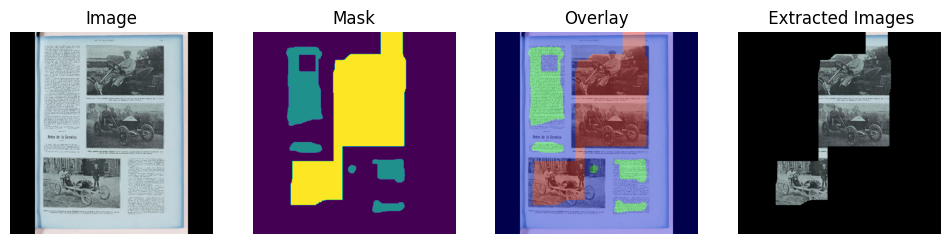

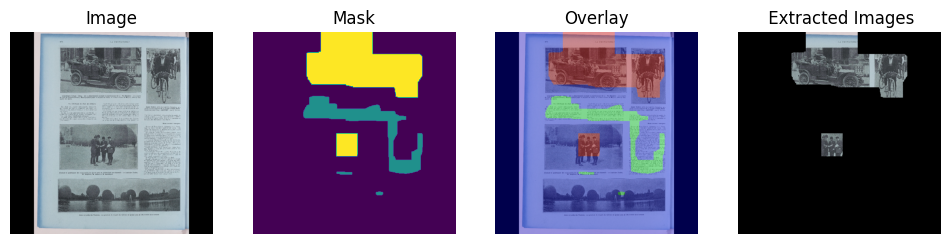

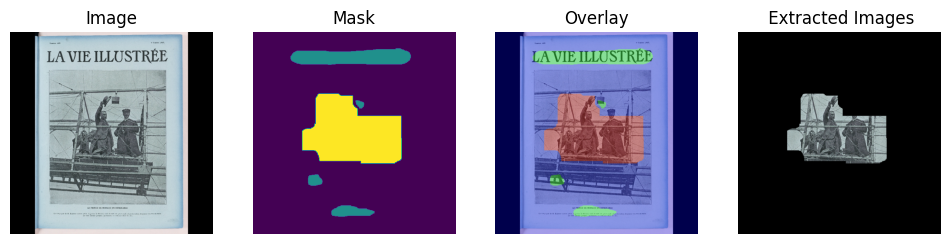

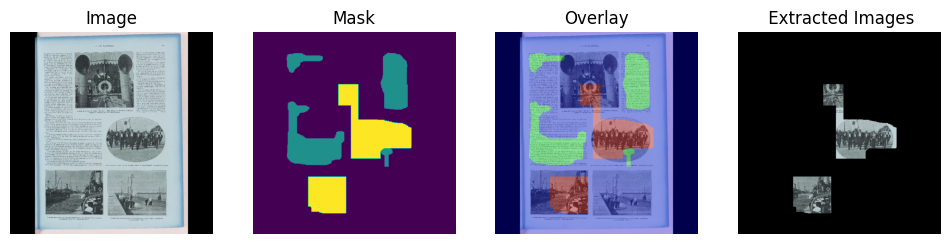

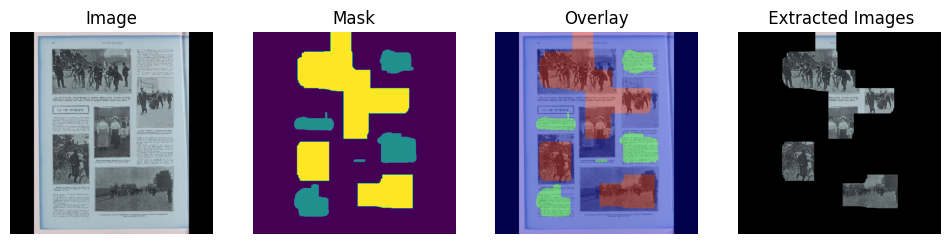

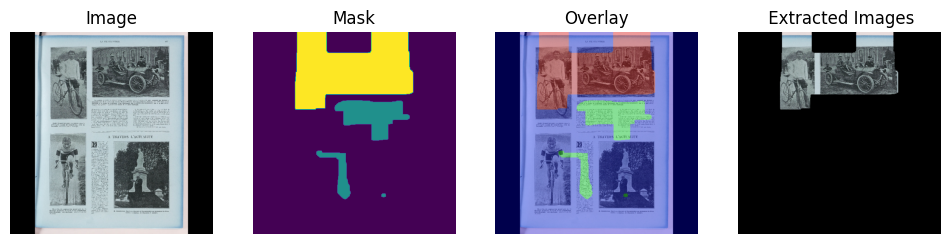

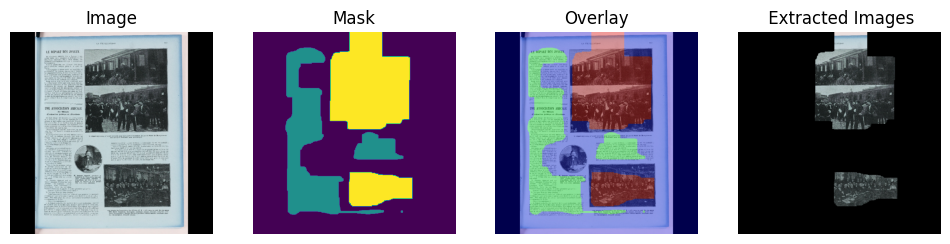

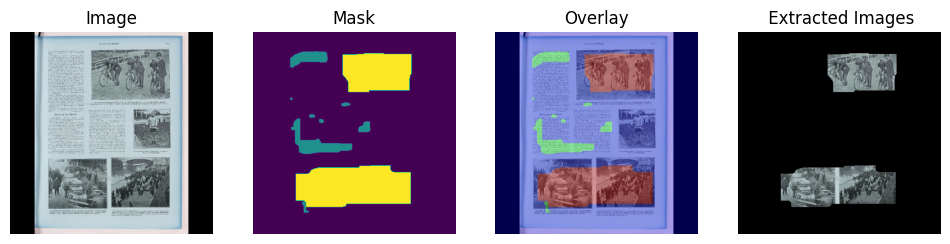

In [90]:
DM.extract_images(path_sim_rol_comp, path_sim_rol_extract)